<a href="https://colab.research.google.com/github/bhagu/1000-Days-Of-Code/blob/main/Pima_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('pima-data.csv')

df.head(10)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False
6,3,78,50,32,88,31.0,0.248,26,1.2608,True
7,10,115,0,0,0,35.3,0.134,29,0.0000,False
8,2,197,70,45,543,30.5,0.158,53,1.7730,True
9,8,125,96,0,0,0.0,0.232,54,0.0000,True


In [3]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [4]:
df.shape

(768, 10)

In [5]:
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [6]:
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [7]:
df.isnull().values.any()

False

In [8]:
def plot_corr(df, size=11):

  corr = df.corr()
  fig, ax = plt.subplots(figsize=(size,size))
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)), corr.columns)
  plt.yticks(range(len(corr.columns)), corr.columns)

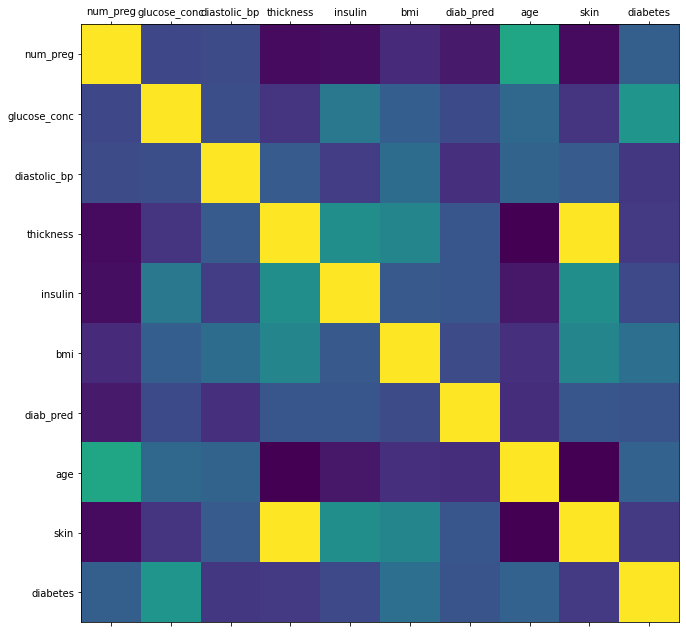

In [9]:
plot_corr(df)

In [10]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [11]:
del df['skin']

In [12]:
df.shape

(768, 9)

In [13]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


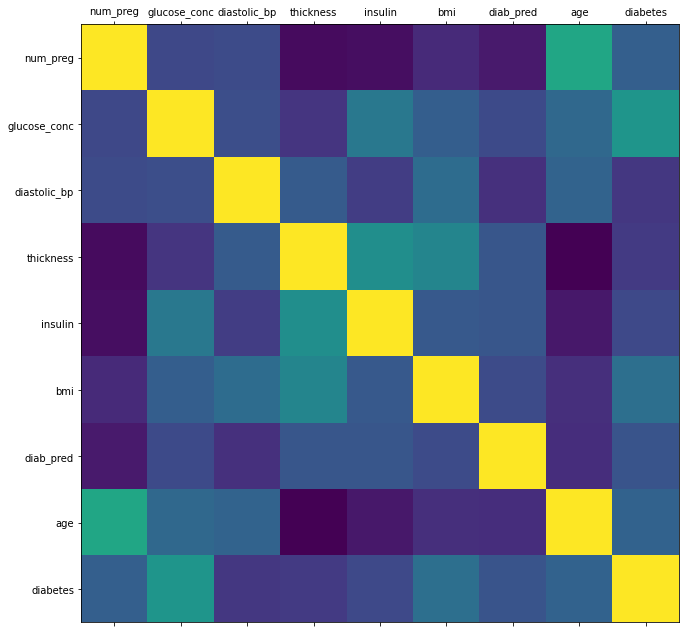

In [14]:
plot_corr(df)

In [15]:
diabetes_map = {True:1, False:0}

In [16]:
type(diabetes_map)

dict

In [17]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [18]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])

In [20]:
num_true/(num_true + num_false)

0.3489583333333333

In [21]:
num_false/(num_true + num_false)

0.6510416666666666

In [22]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [23]:
len(X_train)/len(df.index)

0.69921875

In [24]:
len(X_test)/len(df.index)

0.30078125

In [25]:
len(df.loc[df['diabetes'] == True])/len(df.index)

0.3489583333333333

In [26]:
len(df.loc[df['diabetes'] == False])/len(df.index)

0.6510416666666666

In [27]:
len(y_train[y_train[:] == 1])/len(y_train)

0.3500931098696462

In [28]:
len(y_train[y_train[:] == 0])/len(y_train)

0.6499068901303539

In [29]:
len(y_test[y_test[:] == 1])/len(y_test)

0.3463203463203463

In [30]:
len(y_test[y_test[:] == 0])/len(y_test)

0.6536796536796536

In [31]:
from sklearn.impute import SimpleImputer

fill_0 = SimpleImputer(missing_values=0, strategy='mean')

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [32]:
X_train

array([[  1.        ,  95.        ,  60.        , ...,  23.9       ,
          0.26      ,  22.        ],
       [  5.        , 105.        ,  72.        , ...,  36.9       ,
          0.159     ,  28.        ],
       [  4.34056399, 135.        ,  68.        , ...,  42.3       ,
          0.365     ,  24.        ],
       ...,
       [ 10.        , 101.        ,  86.        , ...,  45.6       ,
          1.136     ,  38.        ],
       [  4.34056399, 141.        ,  72.24131274, ...,  42.4       ,
          0.205     ,  29.        ],
       [  4.34056399, 125.        ,  96.        , ...,  22.5       ,
          0.262     ,  21.        ]])

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
nb_model = GaussianNB()

In [35]:
nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [36]:
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics

metrics.accuracy_score(y_train, nb_predict_train)

0.7541899441340782

In [38]:
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

metrics.accuracy_score(y_test, nb_predict_test)

0.7359307359307359

In [39]:
metrics.confusion_matrix(y_test, nb_predict_test)

array([[118,  33],
       [ 28,  52]])

In [41]:
print(metrics.classification_report(y_test, nb_predict_test))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



In [42]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [45]:
rf_predict_train = rf_model.predict(X_train)

metrics.accuracy_score(y_train, rf_predict_train)

1.0

In [47]:
rf_predict_test = rf_model.predict(X_test)

metrics.accuracy_score(y_test, rf_predict_test)

0.7402597402597403

In [48]:
metrics.confusion_matrix(y_test, rf_predict_test)

array([[119,  32],
       [ 28,  52]])

In [51]:
print(metrics.classification_report(y_test, rf_predict_test))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [52]:
metrics.confusion_matrix(y_train, rf_predict_train)

array([[349,   0],
       [  0, 188]])

In [53]:
print(metrics.classification_report(y_train, rf_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       188

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



In [56]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

print(metrics.accuracy_score(y_test, lr_predict_test))

print(metrics.confusion_matrix(y_test, lr_predict_test))
print(metrics.classification_report(y_test, lr_predict_test))

0.7489177489177489
[[125  26]
 [ 32  48]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       151
           1       0.65      0.60      0.62        80

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


*************************************
0.6
0.1
*************************************


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Text(0, 0.5, 'Recall Score')

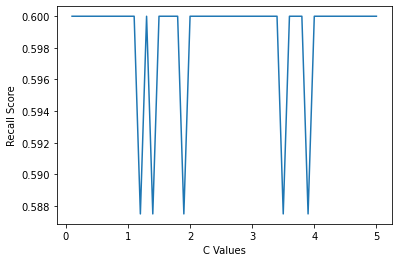

In [58]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0

while (C_val < C_end):
  C_values.append(C_val)
  lr_model_loop = LogisticRegression(C=C_val, random_state=42)
  lr_model_loop.fit(X_train, y_train.ravel())
  lr_predict_loop_test = lr_model_loop.predict(X_test)
  recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
  recall_scores.append(recall_score)
  if (recall_score > best_recall_score):
    best_recall_score = recall_score
    best_lr_predict_test = lr_predict_loop_test

  C_val = C_val + C_inc


best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("*************************************")
print(best_recall_score)
print(best_score_C_val)
print("*************************************")

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C Values")
plt.ylabel("Recall Score")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


*************************************
0.7125
0.2
*************************************


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Text(0, 0.5, 'Recall Score')

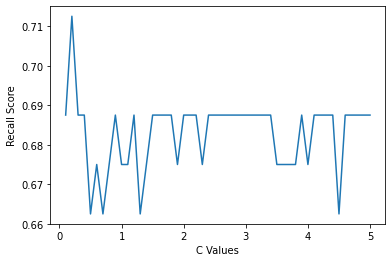

In [60]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0

while (C_val < C_end):
  C_values.append(C_val)
  lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
  lr_model_loop.fit(X_train, y_train.ravel())
  lr_predict_loop_test = lr_model_loop.predict(X_test)
  recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
  recall_scores.append(recall_score)
  if (recall_score > best_recall_score):
    best_recall_score = recall_score
    best_lr_predict_test = lr_predict_loop_test

  C_val = C_val + C_inc


best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("*************************************")
print(best_recall_score)
print(best_score_C_val)
print("*************************************")

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C Values")
plt.ylabel("Recall Score")

In [61]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(class_weight='balanced', C=best_score_C_val, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

print(metrics.accuracy_score(y_test, lr_predict_test))
print(metrics.confusion_matrix(y_test, lr_predict_test))
print(metrics.classification_report(y_test, lr_predict_test))

0.7056277056277056
[[106  45]
 [ 23  57]]
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       151
           1       0.56      0.71      0.63        80

    accuracy                           0.71       231
   macro avg       0.69      0.71      0.69       231
weighted avg       0.73      0.71      0.71       231



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [62]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight='balanced')
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=42, refit=False, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)

In [63]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

In [64]:
print(metrics.accuracy_score(y_test, lr_cv_predict_test))

0.7012987012987013


In [65]:
print(metrics.classification_report(y_test, lr_cv_predict_test))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       151
           1       0.56      0.68      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.68       231
weighted avg       0.72      0.70      0.71       231

